# GRIP - The Sparks Foundation

## Author: Anirudh Roy

## Task 2: Prediction using Unsupervised Machine Learning

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

![https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png](https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png)

# 1. Collect and understand the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Reading data from local folder

df = pd.read_csv('Iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [12]:
df.shape

(150, 6)

# 2. Exploratory Data Analysis(EDA)

In [13]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Text(0.5, 1.0, 'Scatter')

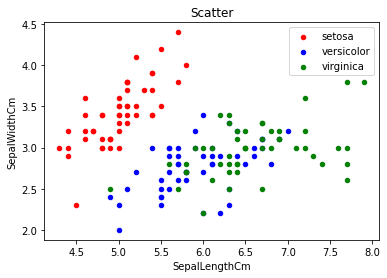

In [21]:
# Scatter plot using pandas

ax = df[df.Species == 'Iris-setosa'].plot.scatter(x ='SepalLengthCm', y ='SepalWidthCm', color = 'red', label = 'setosa')
df[df.Species == 'Iris-versicolor'].plot.scatter(x = 'SepalLengthCm', y = 'SepalWidthCm', color = 'blue', label ='versicolor', ax = ax)
df[df.Species == 'Iris-virginica'].plot.scatter(x = 'SepalLengthCm', y='SepalWidthCm', color='green', label='virginica', ax=ax)

ax.set_title("Scatter")

Text(0.5, 1.0, 'Scatter')

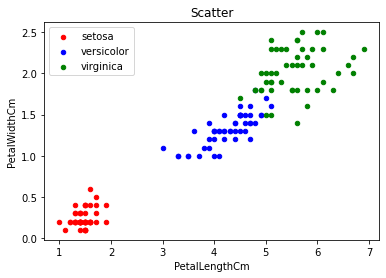

In [22]:
ax = df[df.Species == 'Iris-setosa'].plot.scatter(x='PetalLengthCm', y = 'PetalWidthCm', color = 'red', label = 'setosa')
df[df.Species == 'Iris-versicolor'].plot.scatter(x='PetalLengthCm', y = 'PetalWidthCm', color = 'blue', label = 'versicolor', ax = ax)
df[df.Species == 'Iris-virginica'].plot.scatter(x='PetalLengthCm', y = 'PetalWidthCm', color = 'green', label = 'virginica', ax = ax)

ax.set_title("Scatter")

From the graph we can see the 3 different groups of the respective iris species

# 3. Data Preprocessing

In [40]:
X = df.iloc[:, [0, 1, 2, 3]].values


In [41]:
Y = df['Species'].map({'Iris-setosa':0 , 'Iris-versicolor':1, 'Iris-virginica':2 })
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

**X** = Features, **Y** = Labels

# 4. Modelling

In [42]:
from sklearn.cluster import KMeans

In [43]:
#Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

Using the elbow method to determine the optimal number of clusters for k-means clustering

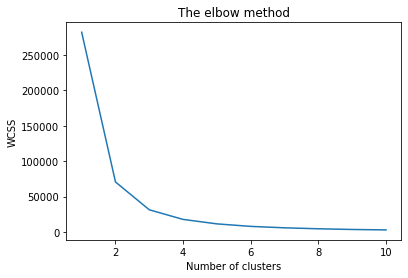

In [44]:
# Plotting the results onto a line graph, 

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 3.

In [45]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [49]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

2D scatterplot using matplotlib

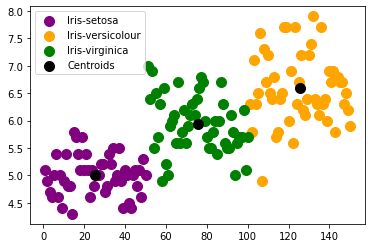

In [51]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

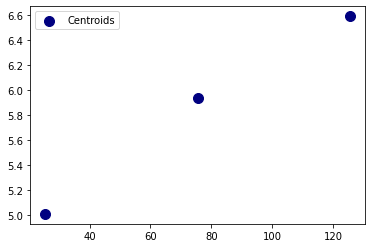

In [53]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'navy', label = 'Centroids')

plt.legend()

# CONCLUSION: 

## The optimum number of cluster for our Iris data-set is 3.

*Thank You*